# Machine Learning approach
- Time series prediction, or forecasting, can be very similar to modelling and prediction with tabular data.
    - A set of input variables, usually a single output variable.
    - Ordinary machine learning methods can be applied.
- The inclusion of time can be done by adding one or more delayed variables, possibly including the response.

## Validation
- As soon as _time_ is part of a model, extra care needs to be taken in validation.
- Cross-validation\*, training-validation-test splits are still relevant.
- However, training, validation and test sets need to follow time chronologically and cannot overlap.
- Instead of traditional cross-validation, one can perform _backtesting_ with a sliding or expanding window:
  
<img src="https://github.com/khliland/IND320/blob/main/D2Dbook/images/Backtesting_sliding.png?raw=TRUE" width="350px">  
<img src="https://github.com/khliland/IND320/blob/main/D2Dbook/images/Backtesting_expanding.png?raw=TRUE" width="350px">  
  
Figures from [Roy Yang's bloggpost on uber.com](https://www.uber.com/en-NO/blog/omphalos/)

```{note}
The first samples will never be in the test set!
```

## Shipping, oil, interest rates and exchange rates
- These data are public data from the Norwegian Bank, SSB, Eurostat and U.S. Energy Information Administration for the period 2000-2014 (monthly).
- The data are available at [ResearchGate](https://www.researchgate.net/publication/275647285_Related_Dataset) and were part of a [Master thesis](https://nmbu.brage.unit.no/nmbu-xmlui/handle/11250/283547) by Raju Rimal.

In [1]:
# Read the FinalData sheet of the OilExchange.xlsx file using Pandas
import pandas as pd
# You may get a warning here, because the file contains pasted grahics
OilExchange = pd.read_excel('../../data/OilExchange.xlsx', sheet_name='FinalData') 
OilExchange.head()

/Users/kristian/miniforge3/envs/IND320_2024/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Date,PerEURO,PerUSD,KeyIntRate,LoanIntRate,EuroIntRate,CPI,OilSpotPrice,ImpOldShip,ImpNewShip,...,ExpExShipOilPlat,TrBal,TrBalExShipOilPlat,TrBalMland,ly.var,l2y.var,l.CPI,ExcChange,Testrain,season
0,2000-01-01,8.1215,8.0129,5.500000,7.500000,3.04,104.1,25.855741,114,915,...,38619,18575,19238,-3257,8.0968,8.1907,103.6,Increase,True,winter
1,2000-02-01,8.0991,8.2361,5.500000,7.500000,3.28,104.6,27.317905,527,359,...,38730,14217,17200,-4529,8.1215,8.0968,104.1,Decrease,True,winter
2,2000-03-01,8.1110,8.4111,5.500000,7.500000,3.51,104.7,26.509183,1385,929,...,42642,13697,18380,-5562,8.0991,8.1215,104.6,Increase,True,Spring
3,2000-04-01,8.1538,8.6081,5.632353,7.632353,3.69,105.1,21.558821,450,2194,...,36860,13142,15499,-5147,8.1110,8.0991,104.7,Increase,True,Spring
4,2000-05-01,8.2015,9.0471,5.750000,7.750000,3.92,105.1,25.147242,239,608,...,42932,17733,18505,-5732,8.1538,8.1110,105.1,Increase,True,Spring


In [2]:
OilExchange.columns

Index(['Date', 'PerEURO', 'PerUSD', 'KeyIntRate', 'LoanIntRate', 'EuroIntRate',
       'CPI', 'OilSpotPrice', 'ImpOldShip', 'ImpNewShip', 'ImpOilPlat',
       'ImpExShipOilPlat', 'ExpCrdOil', 'ExpNatGas', 'ExpCond', 'ExpOldShip',
       'ExpNewShip', 'ExpOilPlat', 'ExpExShipOilPlat', 'TrBal',
       'TrBalExShipOilPlat', 'TrBalMland', 'ly.var', 'l2y.var', 'l.CPI',
       'ExcChange', 'Testrain', 'season'],
      dtype='object')

In [3]:
# Read the FinalCodeBook sheet of the OilExchange.xlsx file using Pandas
Explanations = pd.read_excel('../../data/OilExchange.xlsx', sheet_name='FinalCodeBook')
Explanations[['Variables','Label']]

/Users/kristian/miniforge3/envs/IND320_2024/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Variables,Label
0,Date,Date
1,PerEURO,Exchange Rate of NOK per Euro
2,PerUSD,Exchange Rate of NOK per USD
3,KeyIntRate,Key policy rate (Percent)
4,LoanIntRate,Overnight Lending Rate (Nominal)
5,EuroIntRate,Money market interest rates of Euro area (EA11...
6,CPI,Consumer Price Index (1998=100)
7,OilSpotPrice,Europe Brent Spot Price FOB (NOK per Barrel)
8,ImpOldShip,Imports of elderly ships (NOK million)
9,ImpNewShip,Imports of new ships (NOK million)


### Modelling without time
- For starters, let us ignore time and build a simple prediction model for the exchange rate.
- We will use [scikit-learn's Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to combine standardisation (scaling) and linear regression and [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) to perform random K-fold cross-validation.

In [4]:
# Import Pipeline, StandardScaler, and LinearRegression from their respective modules in sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Create a pipeline that scales the data and performs linear regression
pipe = Pipeline([('scaler', StandardScaler()), ('reg', LinearRegression())])

# Fit the pipeline with PerEURO as response and variables 3:-6 as predictors for the samples having True in the Testrain column
OilExchange_train = OilExchange.loc[OilExchange.Testrain==True,:].copy()
OilExchange_test = OilExchange.loc[OilExchange.Testrain==False,:].copy()
pipe.fit(OilExchange_train.loc[:, OilExchange_train.columns[3:-6]], \
         OilExchange_train.loc[:, 'PerEURO'])

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [5]:
# Predict the corresponding data for Testrain = False
PerEURO_pred = pipe.predict(OilExchange_test.loc[:, OilExchange.columns[3:-6]])

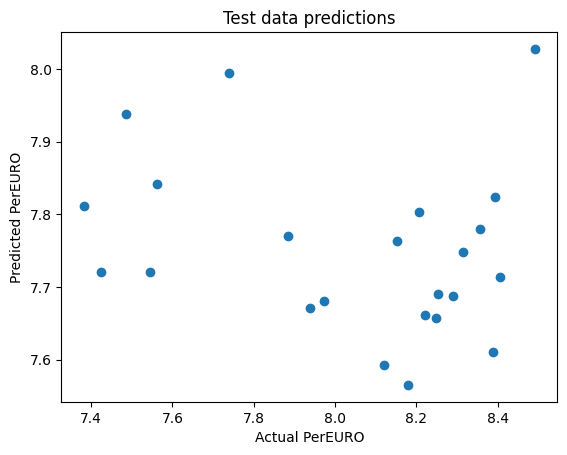

In [6]:
# Plot the predicted values against the actual values
import matplotlib.pyplot as plt
plt.scatter(OilExchange_test.loc[:, 'PerEURO'], PerEURO_pred)
plt.xlabel('Actual PerEURO')
plt.ylabel('Predicted PerEURO')
plt.title('Test data predictions')
plt.show()

In [7]:
# R2 for the test data
from sklearn.metrics import r2_score
r2_score(OilExchange_test.loc[:, 'PerEURO'], PerEURO_pred)

-0.9790095192618866

In [8]:
# Perform k-fold cross-validation with k=10
from sklearn.model_selection import cross_val_predict # NOTE: Not for time series!
PerEURO_cv = cross_val_predict(pipe, OilExchange_train.loc[:, OilExchange.columns[3:-6]], \
                               OilExchange_train.loc[:, 'PerEURO'], cv=10)

# Compute R^2 for PerEURO_cv
r2_cv = r2_score(OilExchange_train.loc[:, 'PerEURO'], PerEURO_cv)
print("Cross-validated R2: {:.3f}".format(r2_cv))

Cross-validated R2: -0.317


### Backtesting
- scikit-learn has a [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) which creates segments for backtesting.
    - _Expanding window_ is the default.
    - _Sliding window_ can be applied by setting the right combination of parameters.
- We will use [scikit-learn's cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) to perform the cross-validation based on the backtesting segments (cross_val_predict assumes that all observations will be test data at some point).


In [9]:
# Backtesting using scikit-learn
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# Some data
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

# Create time series cross-validation object with expanding window
tscv_expand = TimeSeriesSplit()
print(tscv_expand)
for i, (train_index, test_index) in enumerate(tscv_expand.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Fold 0:
  Train: index=[0]
  Test:  index=[1]
Fold 1:
  Train: index=[0 1]
  Test:  index=[2]
Fold 2:
  Train: index=[0 1 2]
  Test:  index=[3]
Fold 3:
  Train: index=[0 1 2 3]
  Test:  index=[4]
Fold 4:
  Train: index=[0 1 2 3 4]
  Test:  index=[5]


In [10]:
# Backtesting with sliding window
tscv_slide = TimeSeriesSplit(max_train_size=3, n_splits=3)
print(tscv_slide)
for i, (train_index, test_index) in enumerate(tscv_slide.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

TimeSeriesSplit(gap=0, max_train_size=3, n_splits=3, test_size=None)
Fold 0:
  Train: index=[0 1 2]
  Test:  index=[3]
Fold 1:
  Train: index=[1 2 3]
  Test:  index=[4]
Fold 2:
  Train: index=[2 3 4]
  Test:  index=[5]


In [11]:
# Backtesting with expanding window in the OilExchange data
tscv_expand = TimeSeriesSplit(n_splits=10)

# The segments
max_train = []
for i, (train_index, test_index) in enumerate(tscv_expand.split(OilExchange_train.loc[:, 'PerEURO'])):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    max_train.append(max(train_index))
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
  Test:  index=[16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
  Test:  index=[30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
  Test:  index=[44 45 46 47 48 49 50 51 52 53 54 55 56 57]
Fold 3:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
  Test:  index=[58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Fold 4:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 6

In [12]:
# Backtesting using expanding window with data
from sklearn.model_selection import cross_validate
scores = cross_validate(pipe, OilExchange_train.loc[:, OilExchange_train.columns[3:-6]], \
                                 OilExchange_train.loc[:, 'PerEURO'], cv=tscv_expand, \
                                    scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.00163889, 0.00238419, 0.00167203, 0.00142694, 0.00125217,
        0.00127506, 0.00126195, 0.00124598, 0.00124907, 0.00121808]),
 'score_time': array([0.00062919, 0.00071383, 0.00069785, 0.00059223, 0.00056911,
        0.00054598, 0.00056577, 0.00057387, 0.00054884, 0.00054193]),
 'test_score': array([-2.58120320e+03, -4.60283547e+00, -7.14984703e+00,  1.63052775e-01,
        -5.45069739e+00, -1.00734416e+11, -1.62104880e+00, -2.82911176e-02,
        -3.42287951e+00, -1.33079128e+01]),
 'train_score': array([1.        , 0.95679732, 0.92352087, 0.85969706, 0.84590771,
        0.78920227, 0.69881999, 0.68809706, 0.65576638, 0.64771763])}

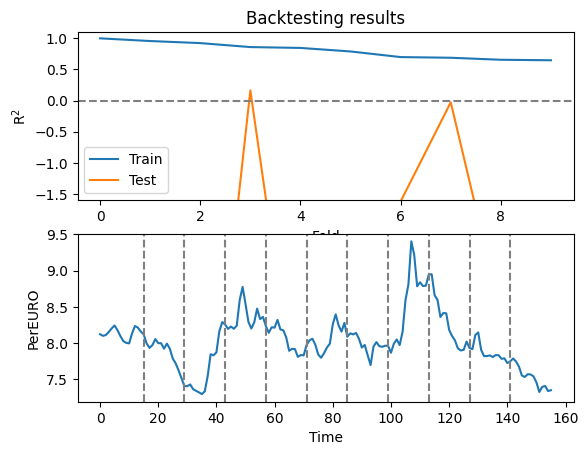

In [13]:
# Plot the backtesting results for train and test data, and under it ad the original data (PerEURO) as a subplot
plt.subplot(2,1,1)
plt.plot(scores['train_score'], label='Train')
plt.plot(scores['test_score'], label='Test')
plt.xlabel('Fold')
plt.ylabel('R$^2$')
plt.title('Backtesting results')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1.6,1.1)
plt.legend()
plt.subplot(2,1,2)
plt.plot(OilExchange_train.loc[:, 'PerEURO'])
for i in range(10):
    plt.axvline(x=max_train[i], color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PerEURO')
plt.show()

__Question:__ Does the behaviour make sense with regard to what is included in and predicted from the model?

In [14]:
# Backtesting with sliding window in the OilExchange data
tscv_slide = TimeSeriesSplit(max_train_size=45, n_splits=10)

# The segments
max_train = []
for i, (train_index, test_index) in enumerate(tscv_slide.split(OilExchange_train.loc[:, 'PerEURO'])):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    max_train.append(max(train_index))
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
  Test:  index=[16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
  Test:  index=[30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
  Test:  index=[44 45 46 47 48 49 50 51 52 53 54 55 56 57]
Fold 3:
  Train: index=[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57]
  Test:  index=[58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Fold 4:
  Train: index=[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
  Test:  index=[72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Fold 5:
  Train: index=[41 42 43 44 

In [15]:
# Backtesting using sliding window with data
from sklearn.model_selection import cross_validate
scores = cross_validate(pipe, OilExchange_train.loc[:, OilExchange_train.columns[3:-4]], \
                                 OilExchange_train.loc[:, 'PerEURO'], cv=tscv_slide, \
                                    scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.00150204, 0.00127387, 0.00165415, 0.00150585, 0.00121188,
        0.00118709, 0.00118279, 0.00116992, 0.00115108, 0.00114727]),
 'score_time': array([0.00063109, 0.00056601, 0.00061107, 0.00060296, 0.00056314,
        0.00054908, 0.00054908, 0.00054598, 0.00054502, 0.00054073]),
 'test_score': array([-2.69048314e+03, -1.41149796e+00, -1.48578129e+00,  2.15110053e-01,
        -7.83627964e+00, -1.40606556e+12,  5.20015261e-01, -2.78711930e+00,
        -7.94540728e+04,  3.87646039e-01]),
 'train_score': array([1.        , 0.99453091, 0.95716141, 0.94470747, 0.96005874,
        0.90744159, 0.75351647, 0.96129276, 0.93446863, 0.94984339])}

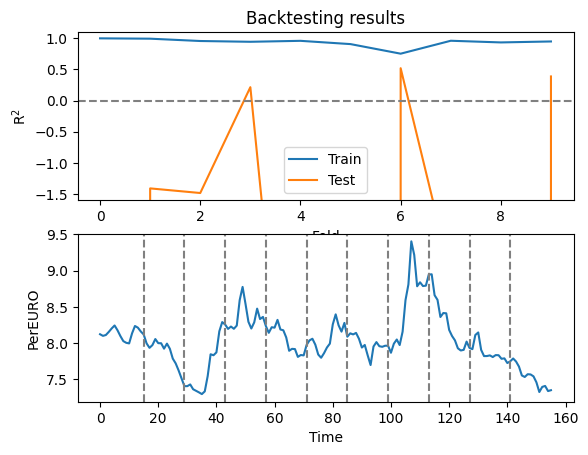

In [16]:
# Plot the backtesting results for train and test data, and under it ad the original data (PerEURO) as a subplot
plt.subplot(2,1,1)
plt.plot(scores['train_score'], label='Train')
plt.plot(scores['test_score'], label='Test')
plt.xlabel('Fold')
plt.ylabel('R$^2$')
plt.title('Backtesting results')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1.6,1.1)
plt.legend()
plt.subplot(2,1,2)
plt.plot(OilExchange_train.loc[:, 'PerEURO'])
for i in range(10):
    plt.axvline(x=max_train[i], color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PerEURO')
plt.show()

__Question:__ Again; does the behaviour make sense with regard to what is included in and predicted from the model?

## Exercise
- Repeat the PerEuro predictions, but exchange LinearRegression with scikit-learns's _PLSRegression_.
- Check if the number of components in the PLS model has an effect on the explained variance ($\text{R}^2$), either manually or using a _GridSearchCV_.

### Including the response variable in the predictors
- As long as the training and test sets are not overlapping, we can include the response as a predictor.
- Adding the response lagged can be done as a single variable or several variables (i.e., several different lags).
- We will later look at ARIMA-type models where time lag is the main mechanism for modelling.

In [17]:
# Add the Per Euro column to the OilExchange data but shifted 1 timepoint backwards (and backfill last value)
OilExchange_train['PerEURO_lag1'] = OilExchange_train.PerEURO.shift(1).bfill()
OilExchange_train.head()

,Date,PerEURO,PerUSD,KeyIntRate,LoanIntRate,EuroIntRate,CPI,OilSpotPrice,ImpOldShip,ImpNewShip,...,TrBal,TrBalExShipOilPlat,TrBalMland,ly.var,l2y.var,l.CPI,ExcChange,Testrain,season,PerEURO_lag1
0,2000-01-01,8.1215,8.0129,5.500000,7.500000,3.04,104.1,25.855741,114,915,...,18575,19238,-3257,8.0968,8.1907,103.6,Increase,True,winter,8.1215
1,2000-02-01,8.0991,8.2361,5.500000,7.500000,3.28,104.6,27.317905,527,359,...,14217,17200,-4529,8.1215,8.0968,104.1,Decrease,True,winter,8.1215
2,2000-03-01,8.1110,8.4111,5.500000,7.500000,3.51,104.7,26.509183,1385,929,...,13697,18380,-5562,8.0991,8.1215,104.6,Increase,True,Spring,8.0991
3,2000-04-01,8.1538,8.6081,5.632353,7.632353,3.69,105.1,21.558821,450,2194,...,13142,15499,-5147,8.1110,8.0991,104.7,Increase,True,Spring,8.1110
4,2000-05-01,8.2015,9.0471,5.750000,7.750000,3.92,105.1,25.147242,239,608,...,17733,18505,-5732,8.1538,8.1110,105.1,Increase,True,Spring,8.1538


In [18]:
# Backtesting using sliding window with data
from sklearn.model_selection import cross_validate #       Negative indexing is scary!      -->
scores = cross_validate(pipe, pd.concat([OilExchange_train.loc[:, OilExchange_train.columns[3:-7]], OilExchange_train["PerEURO_lag1"]], axis=1), \
                                 OilExchange_train.loc[:, 'PerEURO'], cv=tscv_slide, \
                                    scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.00184131, 0.00139403, 0.00140524, 0.00133514, 0.0012033 ,
        0.00117612, 0.00117493, 0.00117397, 0.00115204, 0.00115275]),
 'score_time': array([0.00074387, 0.00058818, 0.00057387, 0.00057864, 0.00055671,
        0.00054812, 0.00055313, 0.00055504, 0.00054407, 0.0005393 ]),
 'test_score': array([-3.23917569e+00, -1.51173590e+00, -2.91230071e+00,  1.34622553e-01,
        -6.81986837e+00, -1.02963323e+12,  5.94148027e-01, -2.01189464e+00,
        -1.67957480e+04,  3.97449531e-01]),
 'train_score': array([1.        , 0.9921763 , 0.95255996, 0.94041573, 0.95467944,
        0.88697053, 0.75049267, 0.95403986, 0.93250471, 0.94798768])}

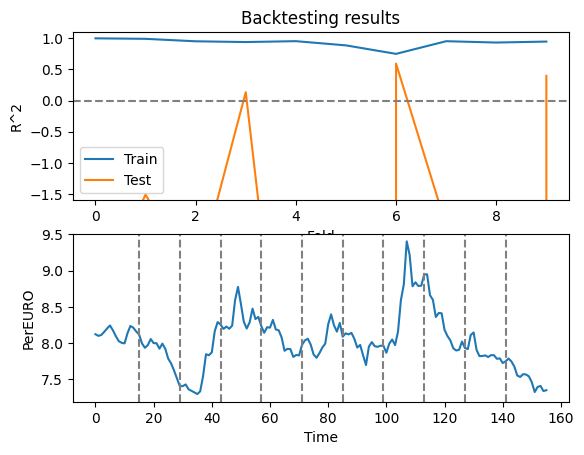

In [19]:
# Plot the backtesting results for train and test data, and under it ad the original data (PerEURO) as a subplot
plt.subplot(2,1,1)
plt.plot(scores['train_score'], label='Train')
plt.plot(scores['test_score'], label='Test')
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.title('Backtesting results')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1.6,1.1)
plt.legend()
plt.subplot(2,1,2)
plt.plot(OilExchange_train.loc[:, 'PerEURO'])
for i in range(10):
    plt.axvline(x=max_train[i], color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PerEURO')
plt.show()

### Five lags

In [20]:
OilExchange_train['PerEURO_lag2'] = OilExchange_train.PerEURO.shift(2).bfill()
OilExchange_train['PerEURO_lag3'] = OilExchange_train.PerEURO.shift(3).bfill()
OilExchange_train['PerEURO_lag4'] = OilExchange_train.PerEURO.shift(4).bfill()
OilExchange_train['PerEURO_lag5'] = OilExchange_train.PerEURO.shift(5).bfill()
OilExchange_train.head()

,Date,PerEURO,PerUSD,KeyIntRate,LoanIntRate,EuroIntRate,CPI,OilSpotPrice,ImpOldShip,ImpNewShip,...,l2y.var,l.CPI,ExcChange,Testrain,season,PerEURO_lag1,PerEURO_lag2,PerEURO_lag3,PerEURO_lag4,PerEURO_lag5
0,2000-01-01,8.1215,8.0129,5.500000,7.500000,3.04,104.1,25.855741,114,915,...,8.1907,103.6,Increase,True,winter,8.1215,8.1215,8.1215,8.1215,8.1215
1,2000-02-01,8.0991,8.2361,5.500000,7.500000,3.28,104.6,27.317905,527,359,...,8.0968,104.1,Decrease,True,winter,8.1215,8.1215,8.1215,8.1215,8.1215
2,2000-03-01,8.1110,8.4111,5.500000,7.500000,3.51,104.7,26.509183,1385,929,...,8.1215,104.6,Increase,True,Spring,8.0991,8.1215,8.1215,8.1215,8.1215
3,2000-04-01,8.1538,8.6081,5.632353,7.632353,3.69,105.1,21.558821,450,2194,...,8.0991,104.7,Increase,True,Spring,8.1110,8.0991,8.1215,8.1215,8.1215
4,2000-05-01,8.2015,9.0471,5.750000,7.750000,3.92,105.1,25.147242,239,608,...,8.1110,105.1,Increase,True,Spring,8.1538,8.1110,8.0991,8.1215,8.1215


In [21]:
# Backtesting using sliding window with data
from sklearn.model_selection import cross_validate #       Negative indexing is scary!      -->
scores = cross_validate(pipe, pd.concat([OilExchange_train.loc[:, OilExchange_train.columns[3:-11]], 
                                         OilExchange_train[["PerEURO_lag1","PerEURO_lag2","PerEURO_lag3","PerEURO_lag4","PerEURO_lag5"]]], axis=1),
                                         OilExchange_train.loc[:, 'PerEURO'], cv=tscv_slide,
                                         scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.0014739 , 0.00196004, 0.00138402, 0.00130582, 0.0012517 ,
        0.00130606, 0.00122285, 0.0012958 , 0.00126219, 0.00126791]),
 'score_time': array([0.00060606, 0.00071001, 0.00060701, 0.00058699, 0.00061011,
        0.00058293, 0.00055408, 0.00058913, 0.00058389, 0.00063181]),
 'test_score': array([-5.69820756e-01, -1.31098583e+00, -4.22244308e+00, -1.10809063e+00,
        -5.93617580e+00, -1.55149966e+12,  5.51939962e-01, -2.81878260e+00,
        -2.51925736e+00,  7.09248896e-01]),
 'train_score': array([1.        , 0.99617589, 0.97075986, 0.95156849, 0.96162574,
        0.92555208, 0.76327123, 0.97259431, 0.95439249, 0.96566249])}

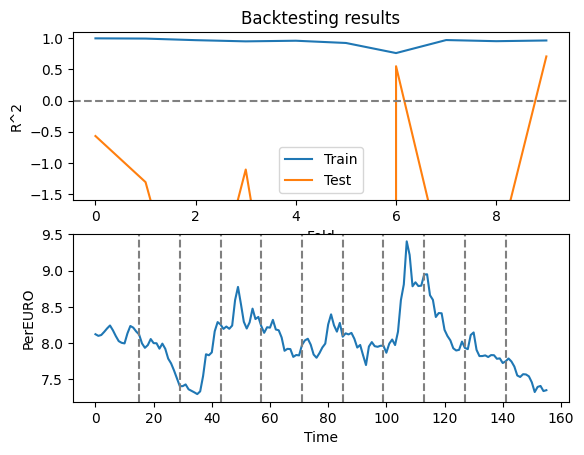

In [22]:
# Plot the backtesting results for train and test data, and under it ad the original data (PerEURO) as a subplot
plt.subplot(2,1,1)
plt.plot(scores['train_score'], label='Train')
plt.plot(scores['test_score'], label='Test')
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.title('Backtesting results')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1.6,1.1)
plt.legend()
plt.subplot(2,1,2)
plt.plot(OilExchange_train.loc[:, 'PerEURO'])
for i in range(10):
    plt.axvline(x=max_train[i], color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PerEURO')
plt.show()

## Correlation between time series
- To get an impression of the connection between different variables, one can compute correlations, e.g., in the form of correlation a matrix.
- If one expects one variable to affect another variable at a later time, correlation with a lag can be computed.
- The degree of connection between two time series may also be dependent on time. 
    - A Sliding Window Correlation (SWC) shows local correlation in time windows.
    - The window size (and possible lag) can be tuned for series of quick or slow changes.
- __Note__: Correlation does not equal causation.
    - There may not be a cause and effect, even though two phenomena show similar patterns. Beautifully illustrated by [Tyler Vigen](https://www.tylervigen.com/spurious-correlations).
- The concept of Autocorrelation will be covered later.

In [23]:
PerEURO_ExpNatGas_corr = np.corrcoef(OilExchange['PerEURO'], OilExchange['ExpNatGas'])
PerEURO_ExpNatGas_corr_lagged = np.corrcoef(OilExchange['PerEURO'][10:], OilExchange['ExpNatGas'][0:len(OilExchange['ExpNatGas'])-10])
print("Correlation between PerEURO and ExpNatGas: {:.3f}".format(PerEURO_ExpNatGas_corr[0,1]))
print("Correlation between PerEURO and ExpNatGas lagged 10 timepoints: {:.3f}".format(PerEURO_ExpNatGas_corr_lagged[0,1]))

Correlation between PerEURO and ExpNatGas: -0.000
Correlation between PerEURO and ExpNatGas lagged 10 timepoints: 0.093


In [24]:
# Use ipywidgets to create a slider for the lag
from ipywidgets import interact
def lagged_correlation(lag=0):
    x.index += lag
    corr = np.corrcoef(y[lag:], x[0:len(y)-lag])
    print("Correlation between {} and {} lagged {} timepoints: {:.3f}".format(x.name, y.name, lag, corr[0,1]))

x = OilExchange['ExpNatGas']
y = OilExchange['PerEURO']
interact(lagged_correlation, lag=(0,100,1)); # Semi-colon to suppress output

interactive(children=(IntSlider(value=0, description='lag'), Output()), _dom_classes=('widget-interact',))

In [25]:
# Sliding window correlation with window size 45
PerEURO_ExpNatGas_SWC = OilExchange['PerEURO'].rolling(45, center=True).corr(OilExchange['ExpNatGas'])

# Plot PerEURO, ExpNatGas and PerEURO_ExpNatGas_SWC as subplots
def plot_SWC(center=22):
    plt.subplot(3,1,1)
    plt.plot(OilExchange['PerEURO'])
    plt.plot(range(center-22,center+22), OilExchange['PerEURO'][center-22:center+22], color="red")
    plt.ylabel('PerEURO')
    plt.xlim(0, len(OilExchange['PerEURO']))
    plt.subplot(3,1,2)
    plt.plot(OilExchange['ExpNatGas'])
    plt.plot(range(center-22,center+22), OilExchange['ExpNatGas'][center-22:center+22], color="red")
    plt.ylabel('ExpNatGas')
    plt.xlim(0, len(OilExchange['PerEURO']))
    plt.subplot(3,1,3)
    plt.plot(PerEURO_ExpNatGas_SWC)
    plt.plot(center, PerEURO_ExpNatGas_SWC[center], 'r.')
    plt.axhline(y=0, color='gray', linestyle=':')
    plt.ylim(-1,1)
    plt.xlim(0, len(OilExchange['PerEURO']))
    plt.xlabel('Time')
    plt.ylabel('SWC')
    plt.show()

interact(plot_SWC, center=(22,len(OilExchange['PerEURO'])-23,1)); # Semi-colon to suppress output

interactive(children=(IntSlider(value=22, description='center', max=156, min=22), Output()), _dom_classes=('wi…

```{note}
If the lag approaches the length of the series, few points are included in the calculations.
```

In [26]:
OilExchange['ExpNatGas']

0       4054
1       3803
2       4017
3       3331
4       2642
       ...  
174    13766
175    13069
176    13946
177    21988
178    19070
Name: ExpNatGas, Length: 179, dtype: int64

### Pandas' rolling()
- When applying Pandas' rolling() function, the index is used for matching the data points.
- Therefore, we need to shift the index of the ExpNatGas to achieve a lag.
- Because of the sliding window, the two series do not need to match in length.

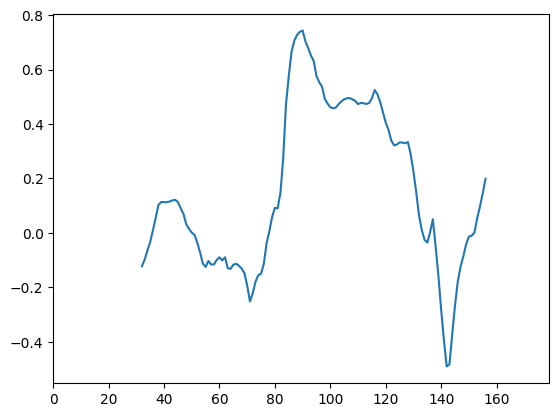

RangeIndex(start=10, stop=189, step=1)

In [27]:
OE = OilExchange['ExpNatGas'].copy() # <- Remember to copy, to avoid changing the original data!
OE.index += 10
plt.plot(OilExchange['PerEURO'].rolling(45, center=True).corr(OE))
plt.xlim(0, len(OilExchange['PerEURO']))
plt.show()
OE.index

## Exercise
- Combine lag and sliding window correlation.
- Use _ipywidgets_ to control:
    - window width
    - lag
    - selected variable to compare to PerEURO
    - bonus: visualize the sliding window like above

```{seealso} Resources
:class: tip
- [Roy Yang's bloggpost on uber.com](https://www.uber.com/en-NO/blog/omphalos/)
- Raju Rimal's dataset on [ResearchGate](https://www.researchgate.net/publication/275647285_Related_Dataset),
- ... and his [Master thesis](https://nmbu.brage.unit.no/nmbu-xmlui/handle/11250/283547).
- [scikit-learn's TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html)
- [scikit-learn's Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- [scikit-learn's cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)
- [scikit-learn's cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
- [Pandas' rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)
```